In [47]:
import matplotlib.pyplot as plt
import numpy as np



In [103]:
import numpy as np
import matplotlib.pyplot as plt

def create_grid(x_max, y_max):
    """
    Creates a grid of x and y coordinates as 2D arrays.

    Parameters:
    - x_max: The maximum value on the x-axis (number of points horizontally).
    - y_max: The maximum value on the y-axis (number of points vertically).

    Returns:
    A tuple of numpy arrays (x, y) representing the grid coordinates as 2D arrays.
    """
    x = np.tile(np.arange(x_max, dtype=float), (y_max, 1))
    y = np.repeat(np.arange(y_max, dtype=float), x_max).reshape(y_max, x_max)
    return x, y

def shift_row(x, y, shift_row, shift_amount):
    """
    Shifts a specific row in the grid to the right.

    Parameters:
    - x, y: The grid coordinates.
    - shift_row: The index of the row to shift.
    - shift_amount: The amount by which to shift the row.
    
    Returns:
    The modified x and y coordinates.
    """
    x[shift_row, :] += shift_amount
    # change the differnce in the other direction, so the length of all liens stays the same
    dy =1- np.sqrt(1 - (shift_amount)**2)

    y[shift_row:, :] -= dy
    y[shift_row+1:, :] -= dy


    return x, y

def squeeze_grid(x, y, squeeze_factor):
    """
    Squeezes the x coordinates of the grid.

    Parameters:
    - x, y: The grid coordinates.
    - squeeze_factor: The factor by which to squeeze the x coordinates.
    
    Returns:
    The modified x and y coordinates.
    """
    x *= squeeze_factor
    return x, y
def shift_dot_in_row(x, y, row_idx, col_idx, dx):
    """
    Shifts a specific dot in a row to the right, and adjusts the positions
    of the other dots in the row so that the first and last dot in the row
    do not move, and the distances between dots are adjusted equidistantly.

    Parameters:
    - x, y: The grid coordinates as 2D arrays.
    - row_idx: The row index of the dot to shift.
    - col_idx: The column index of the dot to shift.
    - dx: The amount to shift the dot to the right.

    Returns:
    The modified x and y coordinates as 2D arrays.
    """
    # Ensure x is float to avoid integer division issues
    x = x.astype(float) 
    num_dots = x.shape[1]  # Number of dots in a row

    # Directly shift the specified dot
    x[row_idx, col_idx] += dx

    # Adjust the positions of the dots to the left and right of the shifted dot
    if col_idx > 0:  # Adjust dots to the left
        left_distances = np.linspace(0, x[row_idx, col_idx] - x[row_idx, 0], col_idx + 1)
        x[row_idx, :col_idx] = x[row_idx, 0] + left_distances[:-1]

    if col_idx < num_dots - 1:  # Adjust dots to the right
        right_distances = np.linspace(x[row_idx, col_idx], x[row_idx, -1], num_dots - col_idx)
        x[row_idx, col_idx+1:] = right_distances[1:]

    return x, y

def get_color(x1, y1, x2, y2):
    """
    Returns a color based on the relative positions of two points.

    Red, if the connection is not of length 1.

    Blue, if the connection is at an angle not 0 or 90 degrees.

    Grey, else.
    
    """

    tolerance = 0.01

    if abs(x1 - x2) !=0 and abs(y1 - y2) !=0:
        return 'blue'
    if abs((x1 - x2)**2 + (y1 - y2)**2 - 1) > tolerance:
        return 'red'
    else:
        return 'grey'
def plot_grid(x, y, x_max, y_max, rescale=0.5,arrow_present = None):
    """
    Plots the grid based on the provided 2D array x and y coordinates.

    Parameters:
    - x, y: The grid coordinates to plot.
    - x_max, y_max: The maximum values for the x-axis and y-axis for size adjustment.
    - rescale: A scaling factor for adjusting the figure size.
    """
    if arrow_present is None:
        arrow_present = np.zeros_like(x)
    plt.figure(figsize=(x_max * rescale, y_max * rescale))
    boundary = 1
    plt.xlim(-boundary, x_max - 1 + boundary)
    plt.ylim(-boundary, y_max - 1 + boundary)
    
    # Iterate through the grid and draw lines between points
    for i in range(y_max):
        for j in range(x_max):
            current_x = x[i, j]
            current_y = y[i, j]

            # Draw horizontal lines
            if j < x_max - 1:  # Ensure we don't try to draw past the last column
                next_x = x[i, j + 1]
                next_y = y[i, j + 1]
                c = get_color(current_x, current_y, next_x, next_y)
                plt.plot([current_x, next_x], [current_y, next_y], color=c, zorder=1, linewidth=4)

            # Draw vertical lines
            if i < y_max - 1:  # Ensure we don't try to draw past the last row
                next_x = x[i + 1, j]
                next_y = y[i + 1, j]
                c = get_color(current_x, current_y, next_x, next_y)
                plt.plot([current_x, next_x], [current_y, next_y], color=c, zorder=1, linewidth=4)

    # Scatter points for all coordinates
    plt.scatter(x, y, color='black', zorder=2, s=200)

    # Draw arrows
    for i in range(y_max):
        for j in range(x_max):
            if arrow_present[i, j] == 1:
                plt.arrow(x[i, j]-.15, y[i, j], .2, 0, head_width=0.2, head_length=0.2, fc='white', ec='white', zorder=3, length_includes_head=False)
    
    plt.axis('off')
    plt.gca()#.set_aspect('equal', adjustable='box')
    plt.show()


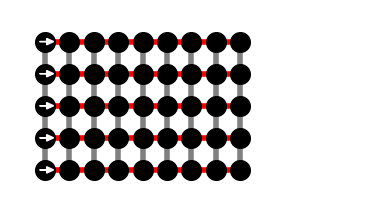

In [104]:
# Example usage
x_max, y_max = 9, 5
x, y = create_grid(x_max, y_max)
x, y = squeeze_grid(x, y, .7) # Squeeze the grid by a factor of 0.7
arrow_present = np.zeros_like(x)
arrow_present[:,0] = 1
plot_grid(x, y, x_max, y_max, rescale=0.5, arrow_present=arrow_present)

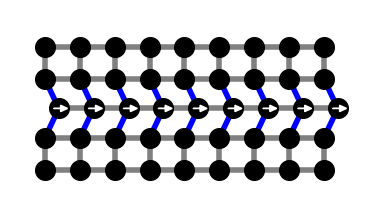

In [105]:
# Example usage
x_max, y_max = 9, 5
x, y = create_grid(x_max, y_max)
#x, y = squeeze_grid(x, y, .9) # Squeeze the grid by a factor of 0.7
x, y = shift_row(x, y, 2, .4) # Shift row 2 by 0.4
arrow_present = np.zeros_like(x)
arrow_present[2,:] = 1
plot_grid(x, y, x_max, y_max, rescale=0.5, arrow_present=arrow_present)

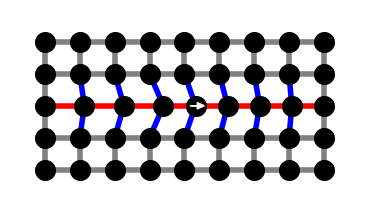

In [110]:
# Example usage
x_max, y_max = 9, 5
x, y = create_grid(x_max, y_max)
#x, y = squeeze_grid(x, y, .9) # Squeeze the grid by a factor of 0.7
#x, y = shift_row(x, y, 2, .4) # Shift row 2 by 0.4
x, y = shift_dot_in_row(x, y, 2, 3, 0.4) # Shift dot (2, 3) by 0.4
arrow_present = np.zeros_like(x)
arrow_present[2,4] = 1
plot_grid(x, y, x_max, y_max, rescale=.5, arrow_present=arrow_present)